#                                        Diabetes Predictor

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import scipy as sp
import pickle

# Importing and visualizing the data

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


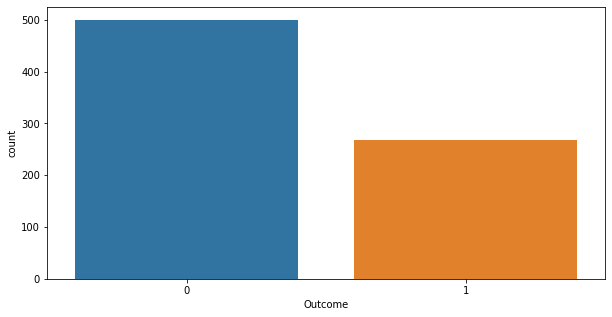

In [4]:
## Finding the total healty and diabetic people

plt.figure(figsize=(10,5))
sns.countplot(x='Outcome', data=data)
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
data.isnull().sum()


##No null values found

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
print(sp.mean(data))

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.


In [10]:
print(sp.median(data))

24.3


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  """Entry point for launching an IPython kernel.


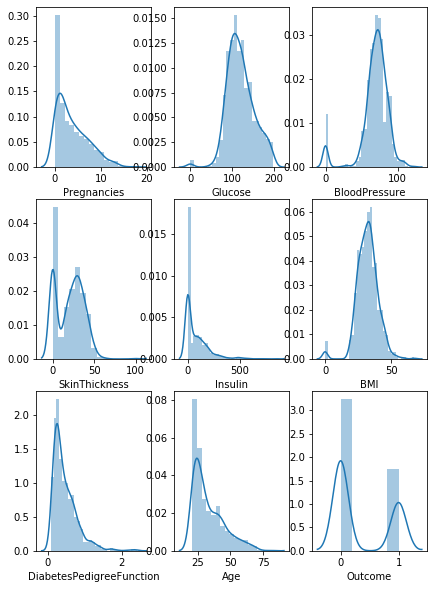

In [11]:
plt.figure(figsize=(7,10), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


## We can see that there are lots of zeros in some features and pregnancies,insulin and age are not normalised.
## All the rest features are ok

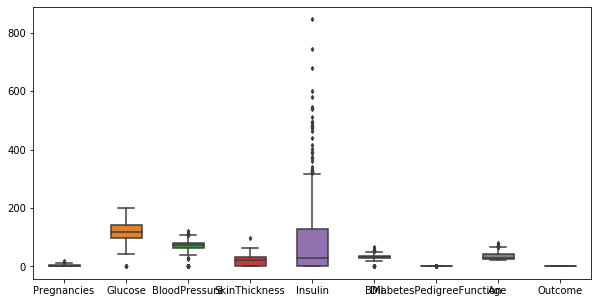

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


## We can see outliers and we need to treat them as well upto a upper point

# Feature Engineering

In [13]:
##Restricting the outliers upto a certain limit i.e. upper_limit and lower_limit


def limit_imputer(value):
    if(value>upper_limit):
        return upper_limit
    elif(value<lower_limit):
        return lower_limit
    else:
        return value

In [14]:
mean=data["Insulin"].mean()
std=data["Insulin"].std()
upper_limit=mean+3*std
lower_limit=mean-3*std

In [15]:
data['Insulin']=data['Insulin'].apply(limit_imputer)

In [16]:
mean=data["Pregnancies"].mean()
std=data["Pregnancies"].std()
upper_limit=mean+3*std
lower_limit=mean-3*std
data['Pregnancies']=data['Pregnancies'].apply(limit_imputer)

In [17]:
mean=data["BloodPressure"].mean()
std=data["BloodPressure"].std()
upper_limit=mean+3*std
lower_limit=mean-3*std
data["BloodPressure"]=data["BloodPressure"].apply(limit_imputer)

In [18]:
mean=data["SkinThickness"].mean()
std=data["SkinThickness"].std()
upper_limit=mean+3*std
lower_limit=mean-3*std
data["SkinThickness"]=data["SkinThickness"].apply(limit_imputer)

In [19]:
mean=data["BMI"].mean()
std=data["BMI"].std()
upper_limit=mean+3*std
lower_limit=mean-3*std
data["BMI"]=data["BMI"].apply(limit_imputer)

In [20]:
mean=data['DiabetesPedigreeFunction'].mean()
std=data['DiabetesPedigreeFunction'].std()
upper_limit=mean+3*std
lower_limit=mean-3*std
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].apply(limit_imputer)

In [21]:
mean=data["Age"].mean()
std=data["Age"].std()
upper_limit=mean+3*std
lower_limit=mean-3*std
data["Age"]=data["Age"].apply(limit_imputer)

In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.839603,120.894531,69.608505,20.496606,76.909592,32.090073,0.465460,33.216937,0.348958
std,3.351147,31.972618,17.616411,15.793381,103.235344,7.366246,0.304492,11.678537,0.476951
min,0.000000,0.000000,11.038047,0.000000,0.000000,8.340097,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.953786,199.000000,122.000000,68.393111,425.531486,55.645059,1.465862,68.521580,1.000000


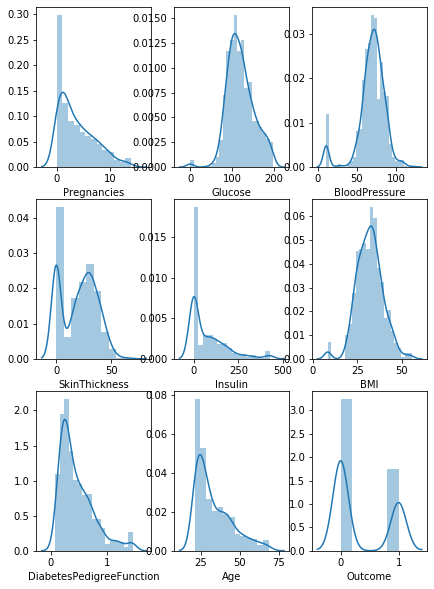

In [23]:
plt.figure(figsize=(7,10), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

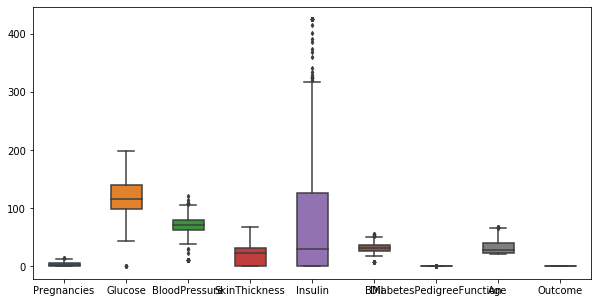

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)




##Now we can see that the outliers are bit less but they are still present so we will proceed with this

In [25]:
## Replacing the zeros with the mean values


data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

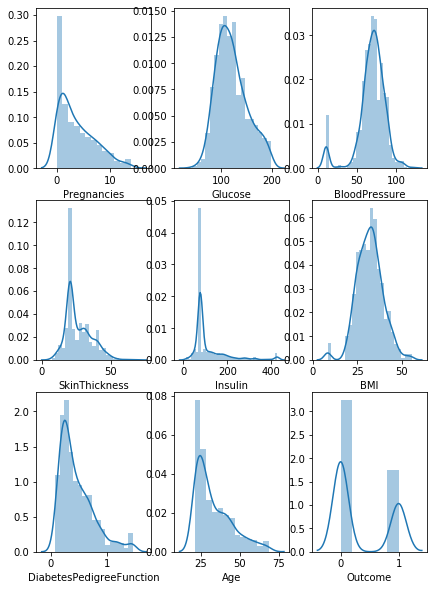

In [26]:
plt.figure(figsize=(7,10), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()



## Now we can see that insulin and glucose 

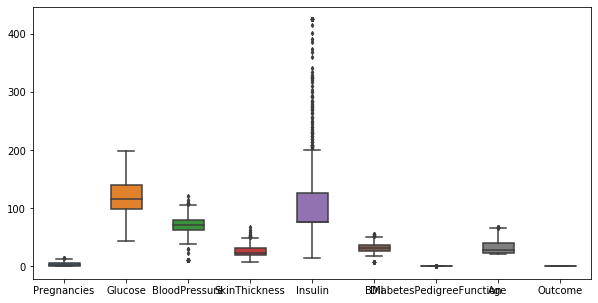

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

# Standardization of data and splitting it into train and test sets

In [28]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [29]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state=192)

# Variance Inflation Factor

In [31]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
print(vif)

        vif                  Features
0  1.434409               Pregnancies
1  1.344490                   Glucose
2  1.162808             BloodPressure
3  1.458442             SkinThickness
4  1.278062                   Insulin
5  1.506732                       BMI
6  1.045163  DiabetesPedigreeFunction
7  1.585203                       Age


# Logistic Regression

In [32]:
log_reg = LogisticRegression(class_weight = 'balanced')
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = log_reg.predict(x_test)

In [34]:
accuracy_logistic = accuracy_score(y_test,y_pred)
print("Logistic Regression Accuracy:",accuracy_logistic)

Logistic Regression Accuracy: 0.8072916666666666


In [35]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",conf_mat)

Confusion Matrix: [[87 21]
 [16 68]]


In [36]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [37]:
Precision = true_positive/(true_positive+false_positive)
print("Precision:",Precision)

Precision: 0.8055555555555556


In [38]:
Recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print("Recall:",Recall)

Recall: 0.8446601941747572


# Using Decission Tree

In [39]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
print('Decission Tree Accuracy:',clf.score(x_test,y_test))

Decission Tree Accuracy: 0.7239583333333334


In [41]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [43]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [44]:
best_parameters = grid_search.best_params_
print(best_parameters)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 9, 'min_samples_split': 5, 'splitter': 'random'}
0.7638980509745128


In [45]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =14, min_samples_leaf= 8, min_samples_split= 8, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [46]:
print('Decission Tree Accuracy after hyperparameter tuning:',clf.score(x_test,y_test))

Decission Tree Accuracy after hyperparameter tuning: 0.7760416666666666


In [47]:
accuracy_decissionTree=clf.score(x_test,y_test)

In [48]:
y_pred=clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",conf_mat)
Recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print("Recall:",Recall)

Confusion Matrix: [[95 13]
 [30 54]]
Recall: 0.76


# Random Forest

In [49]:
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(x_train,y_train)
y_pred=rand_clf.predict(x_test)

In [50]:
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",conf_mat)
Recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print("Recall:",Recall)

Confusion Matrix: [[98 10]
 [27 57]]
Recall: 0.784


In [51]:
accuracy_randomForest=rand_clf.score(x_test,y_test)

# XGBoost

In [52]:
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(x_train,y_train)

[12:23:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [53]:
y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy_xgboost = accuracy_score(y_test,predictions)

In [54]:
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",conf_mat)
Recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print("Recall:",Recall)

Confusion Matrix: [[86 22]
 [29 55]]
Recall: 0.7478260869565218


# KNN

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_knn=knn.score(x_test,y_test)

In [56]:
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",conf_mat)
Recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print("Recall:",Recall)

Confusion Matrix: [[86 22]
 [34 50]]
Recall: 0.7166666666666667


# Bagging using KNN

In [57]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 
bag_knn.fit(x_train, y_train)
accuracy_bagging=bag_knn.score(x_test, y_test)
y_pred=bag_knn.predict(x_test)

In [58]:
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",conf_mat)
Recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print("Recall:",Recall)

Confusion Matrix: [[95 13]
 [35 49]]
Recall: 0.7307692307692307


# SGDClassifier

In [59]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
y_pred=sgd_clf.predict(x_test)
accuracy_sgdclassifier=sgd_clf.score(x_test,y_test)

In [60]:
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",conf_mat)
Recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print("Recall:",Recall)

Confusion Matrix: [[85 23]
 [40 44]]
Recall: 0.68


# Printing the accuracy of all the models to find the best one

In [61]:
print('Logistic Regression:',accuracy_logistic)
print('Decission Tree:',accuracy_decissionTree)
print('Random Forest:',accuracy_randomForest)
print('XGBoost:',accuracy_xgboost)
print('KNN:',accuracy_knn)
print('Bagging:',accuracy_bagging)
print('SGDClassifier:',accuracy_sgdclassifier)

Logistic Regression: 0.8072916666666666
Decission Tree: 0.7760416666666666
Random Forest: 0.8072916666666666
XGBoost: 0.734375
KNN: 0.7083333333333334
Bagging: 0.75
SGDClassifier: 0.671875


In [62]:
accuracy=[accuracy_logistic,accuracy_decissionTree,accuracy_randomForest,accuracy_xgboost,accuracy_knn,accuracy_bagging,accuracy_sgdclassifier]
models=['Logistic','DT','Random Forest','XGBoost','KNN','Bagging','SGDClassifier']

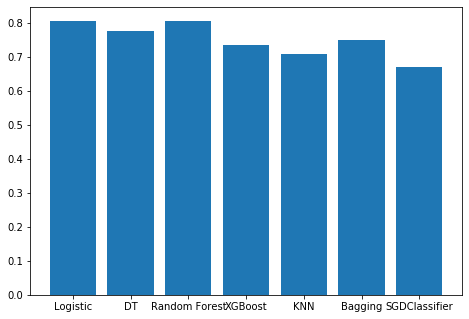

In [63]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,accuracy)
plt.show()

# Conclusion

So we can clearly see that we are getting more accuracy in Logistic Regression and Random Forest but recall value in Logistic Regression is high then Random Forest and as this is a disease predictor so here recal can be given a priority so we will choose Logistic as our final model

# Model dumping

In [65]:
#Dumping our final model in a pickle file
pickle.dump(log_reg,open('model.pkl','wb'))